<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/ResoluteAI_Task_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feature-engine --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score,recall_score,f1_score

from feature_engine.selection import SmartCorrelatedSelection

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/DataSets/Task1and2/train.xlsx')

In [5]:
df.shape

(36752, 19)

In [6]:
df.sample(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
32396,-55,-66,-53,-59,-62,-64,-68,-66,-66,-60,-56,-57,-61,-63,-71,-65,-60,-66,A28
8576,-75,-69,-71,-76,-65,-60,-69,-62,-49,-76,-75,-71,-68,-71,-61,-57,-53,-56,A80
22017,-82,-71,-61,-72,-65,-71,-63,-50,-50,-76,-80,-67,-68,-55,-67,-53,-50,-57,B63
22884,-72,-79,-95,-71,-81,-72,-61,-55,-61,-71,-70,-81,-66,-76,-66,-60,-56,-64,A62
35765,-69,-83,-72,-69,-69,-63,-72,-55,-46,-76,-66,-65,-66,-60,-76,-62,-51,-40,B71


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [8]:
df.describe() \
.T \
.style \
.background_gradient('crest',axis=0)

,count,mean,std,min,25%,50%,75%,max
T1,36752.000000,-65.865449,8.737286,-95.000000,-72.000000,-66.000000,-61.000000,-41.000000
T2,36752.000000,-64.521931,8.914559,-95.000000,-70.000000,-65.000000,-59.000000,-37.000000
T3,36752.000000,-64.574472,8.154517,-95.000000,-70.000000,-64.000000,-59.000000,-41.000000
T4,36752.000000,-65.296474,8.142803,-95.000000,-70.000000,-66.000000,-61.000000,-39.000000
T5,36752.000000,-64.462152,8.068375,-95.000000,-69.000000,-65.000000,-59.000000,-36.000000
T6,36752.000000,-63.318731,8.651501,-95.000000,-69.000000,-63.000000,-57.000000,-39.000000
T7,36752.000000,-67.030202,9.257529,-95.000000,-74.000000,-66.000000,-60.000000,-45.000000
T8,36752.000000,-66.591260,10.160193,-95.000000,-75.000000,-66.000000,-59.000000,-39.000000
T9,36752.000000,-65.692479,10.598247,-95.000000,-73.000000,-65.000000,-58.000000,-39.000000
T10,36752.000000,-65.555181,10.408147,-95.000000,-73.000000,-65.000000,-58.000000,-37.000000


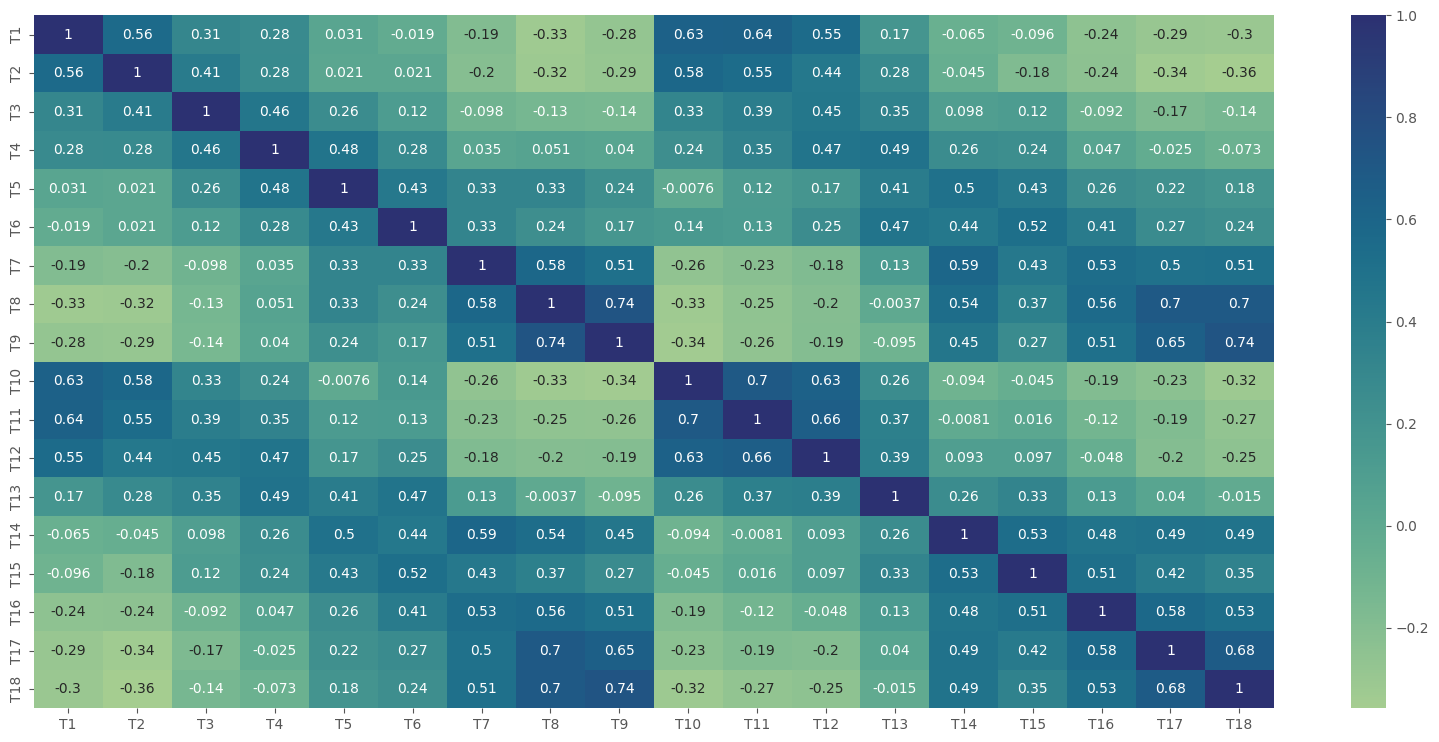

In [9]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

# plan of action to develop clustering program

	- 1 First create a deep learning model using keras and fit the original data to it so we can get the base result which later help us to evaluate the performance improvements
		- 1.1 Without Preprocessing
		- 1.2 With Preprocessing

	- 2 Second approch is use feature selection techneques to reduce the complexcity and the fit the deep learning model and compare that to base results
		- 2.1 Without Preprocessing
		- 2.2 With Preprocessing

	- Based on the results fine tuned the deep learning model using keras tuner
	- Evaluate the model and compare it with previous model results
	- Save the model

In [136]:
X,y = df.drop(['target'],axis=1),df['target']

In [137]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.3, random_state=101,stratify=y_other)

In [138]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# 1 **First create a deep learning model using keras and fit the original data to it so we can get the base result which later help us to evaluate the performance improvements.**
    - 1.1 Without Preprocessing
    - 1.2 With Preprocessing

### 1.1 **Without Preprocessing**

In [145]:
y_train_transformed = pd.get_dummies(y_train)
y_val_transformed = pd.get_dummies(y_val)
y_test_transformed = pd.get_dummies(y_test)

In [140]:
X_train.shape,X_val.shape,X_test.shape

((25726, 18), (7718, 18), (3308, 18))

In [141]:
Model_1_1 = Sequential()
Model_1_1.add(Input(shape=X_train.shape[1]))
Model_1_1.add(Dense(units=32,activation='relu'))
Model_1_1.add(Dense(units=16,activation='relu'))
Model_1_1.add(Dense(units=160,activation='softmax'))

Model_1_1.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [142]:
Model_1_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                608       
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3856 (15.06 KB)
Trainable params: 3856 (15.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
Model_1_1.fit(X_train,y_train_transformed,epochs=150,batch_size=256,validation_data=(X_val,y_val_transformed))

Epoch 1/150
101/101 [==============================] - 1s 3ms/step - loss: 5.5174 - categorical_crossentropy: 5.5174 - val_loss: 4.6717 - val_categorical_crossentropy: 4.6717
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 4.3056 - categorical_crossentropy: 4.3056 - val_loss: 3.8873 - val_categorical_crossentropy: 3.8873
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 3.4278 - categorical_crossentropy: 3.4278 - val_loss: 2.9726 - val_categorical_crossentropy: 2.9726
Epoch 4/150
101/101 [==============================] - 0s 3ms/step - loss: 2.5841 - categorical_crossentropy: 2.5841 - val_loss: 2.1758 - val_categorical_crossentropy: 2.1758
Epoch 5/150
101/101 [==============================] - 0s 3ms/step - loss: 1.8538 - categorical_crossentropy: 1.8538 - val_loss: 1.5933 - val_categorical_crossentropy: 1.5933
Epoch 6/150
101/101 [==============================] - 0s 3ms/step - loss: 1.3748 - categorical_crossentropy: 1.3748 - val_lo

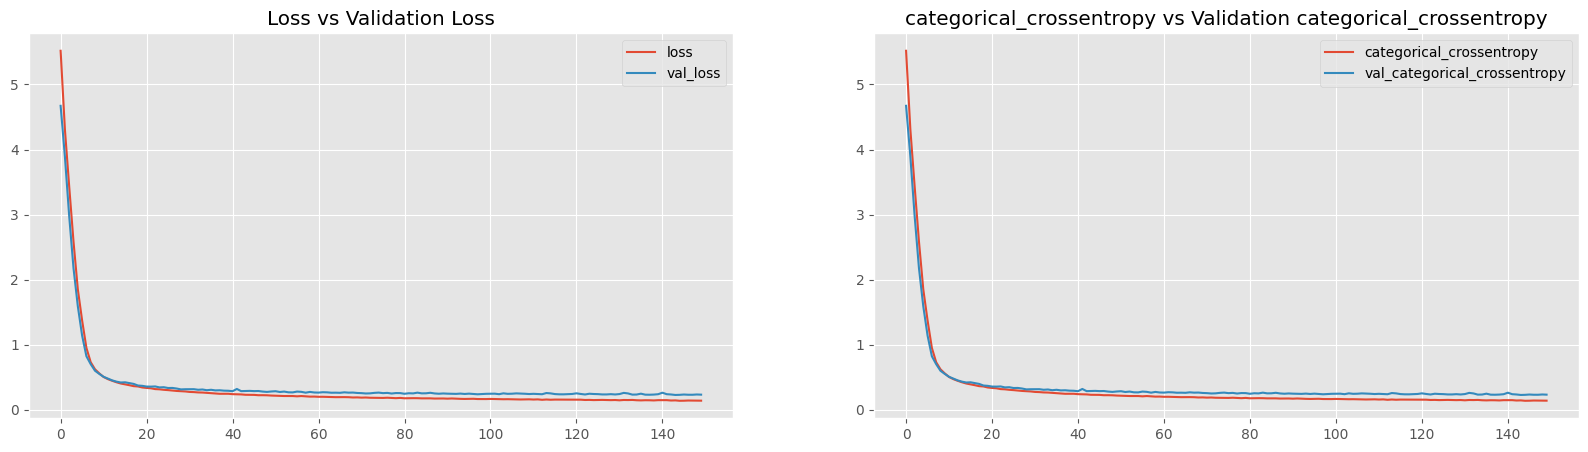

In [144]:
Model_Results_1_1 = pd.DataFrame(Model_1_1.history.history)
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Loss vs Validation Loss')
ax[0].plot(Model_Results_1_1['loss'],label='loss')
ax[0].plot(Model_Results_1_1['val_loss'],label='val_loss')
ax[0].legend()

ax[1].set_title('categorical_crossentropy vs Validation categorical_crossentropy')
ax[1].plot(Model_Results_1_1['categorical_crossentropy'],label='categorical_crossentropy')
ax[1].plot(Model_Results_1_1['val_categorical_crossentropy'],label='val_categorical_crossentropy')
ax[1].legend()

plt.show()

In [146]:
Model_1_1_val_pred = Model_1_1.predict(X_val)
Model_1_1_test_pred = Model_1_1.predict(X_test)

104/104 [==============================] - 0s 950us/step


In [147]:
# y_val_transformed.idxmax(axis=1)
Model_1_1_val_orig  = np.array(y_val_transformed).argmax(axis=1)
Model_1_1_val_predictions = Model_1_1_val_pred.argmax(axis=1)

Model_1_1_test_orig  = np.array(y_test_transformed).argmax(axis=1)
Model_1_1_test_predictions = Model_1_1_test_pred.argmax(axis=1)

In [148]:
print(f"Validation Results \nprecision_score : {precision_score(Model_1_1_val_orig,Model_1_1_val_predictions, average='weighted')},\nrecall_score : {recall_score(Model_1_1_val_orig,Model_1_1_val_predictions, average='weighted')},\nf1_score : {f1_score(Model_1_1_val_orig,Model_1_1_val_predictions, average='weighted')}")

Validation Results 
precision_score : 0.9660719062949349,
recall_score : 0.9639803057786992,
f1_score : 0.9637139948583524


In [149]:
print(f"Validation Results \nprecision_score : {precision_score(Model_1_1_test_orig,Model_1_1_test_predictions, average='weighted')},\nrecall_score : {recall_score(Model_1_1_test_orig,Model_1_1_test_predictions, average='weighted')},\nf1_score : {f1_score(Model_1_1_test_orig,Model_1_1_test_predictions, average='weighted')}")

Validation Results 
precision_score : 0.9641203035156809,
recall_score : 0.9607013301088271,
f1_score : 0.9601049680961916


### 1.2 **With Preprocessing**

In [150]:
stdscaler = StandardScaler()
X_train_transformed = stdscaler.fit_transform(X_train,y_train_transformed)
X_val_transformed = stdscaler.transform(X_val)
X_test_transformed = stdscaler.transform(X_test)

In [151]:
X_train_transformed.shape

(25726, 18)

In [155]:
Model_1_2 = Sequential()
Model_1_2.add(Input(shape=X_train.shape[1]))
Model_1_2.add(Dense(units=32,activation='relu'))
Model_1_2.add(Dense(units=16,activation='relu'))
Model_1_2.add(Dense(units=160,activation='softmax'))

Model_1_2.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [156]:
Model_1_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                608       
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3856 (15.06 KB)
Trainable params: 3856 (15.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
Model_1_2.fit(X_train_transformed,y_train_transformed,epochs=150,batch_size=256,validation_data=(X_val_transformed,y_val_transformed))

Epoch 1/150
101/101 [==============================] - 28s 270ms/step - loss: 4.7764 - categorical_crossentropy: 4.7764 - val_loss: 4.2011 - val_categorical_crossentropy: 4.2011
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 3.3931 - categorical_crossentropy: 3.3931 - val_loss: 2.5813 - val_categorical_crossentropy: 2.5813
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 1.9567 - categorical_crossentropy: 1.9567 - val_loss: 1.3978 - val_categorical_crossentropy: 1.3978
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 1.0581 - categorical_crossentropy: 1.0581 - val_loss: 0.7865 - val_categorical_crossentropy: 0.7865
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6338 - categorical_crossentropy: 0.6338 - val_loss: 0.5223 - val_categorical_crossentropy: 0.5223
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 0.4492 - categorical_crossentropy: 0.4492 - val

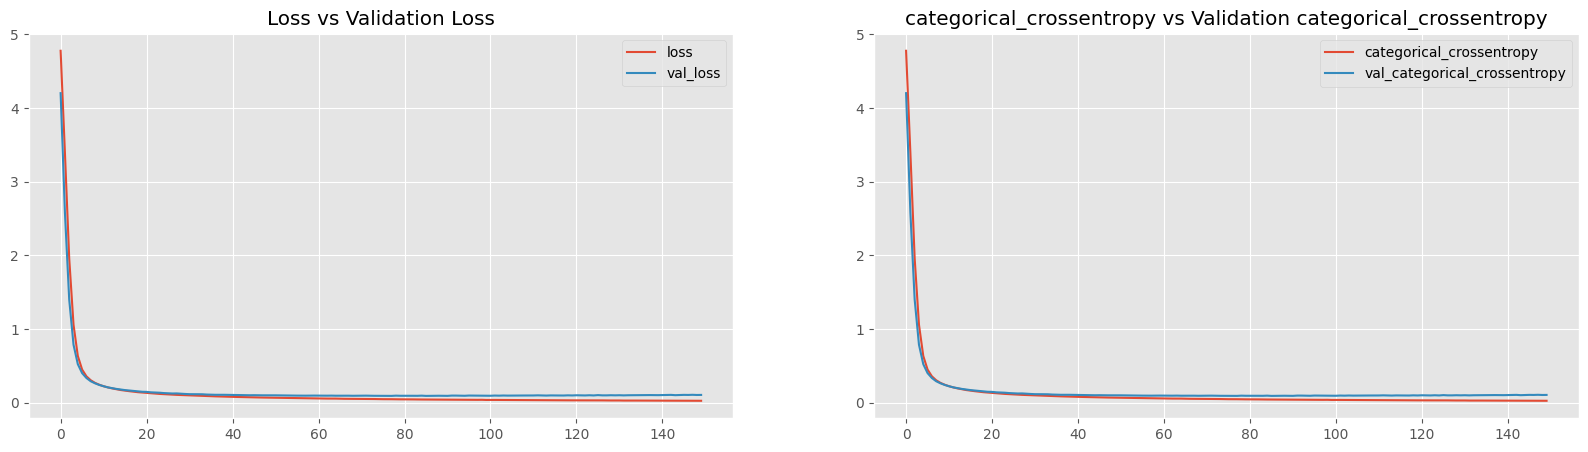

In [158]:
Model_Results_1_2 = pd.DataFrame(Model_1_2.history.history)
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Loss vs Validation Loss')
ax[0].plot(Model_Results_1_2['loss'],label='loss')
ax[0].plot(Model_Results_1_2['val_loss'],label='val_loss')
ax[0].legend()

ax[1].set_title('categorical_crossentropy vs Validation categorical_crossentropy')
ax[1].plot(Model_Results_1_2['categorical_crossentropy'],label='categorical_crossentropy')
ax[1].plot(Model_Results_1_2['val_categorical_crossentropy'],label='val_categorical_crossentropy')
ax[1].legend()

plt.show()

In [159]:
Model_1_2_val_pred = Model_1_2.predict(X_val_transformed)
Model_1_2_test_pred = Model_1_2.predict(X_test_transformed)

104/104 [==============================] - 0s 2ms/step


In [160]:
# y_val_transformed.idxmax(axis=1)
Model_1_2_val_orig  = np.array(y_val_transformed).argmax(axis=1)
Model_1_2_val_predictions = Model_1_2_val_pred.argmax(axis=1)

Model_1_2_test_orig  = np.array(y_test_transformed).argmax(axis=1)
Model_1_2_test_predictions = Model_1_2_test_pred.argmax(axis=1)

In [161]:
print(f"Validation Results \nprecision_score : {precision_score(Model_1_2_val_orig,Model_1_2_val_predictions, average='weighted')},\nrecall_score : {recall_score(Model_1_2_val_orig,Model_1_2_val_predictions, average='weighted')},\nf1_score : {f1_score(Model_1_2_val_orig,Model_1_2_val_predictions, average='weighted')}")

Validation Results 
precision_score : 0.9813840884766091,
recall_score : 0.9805649131899455,
f1_score : 0.9804562916915045


In [162]:
print(f"Test Results \nprecision_score : {precision_score(Model_1_2_test_orig,Model_1_2_test_predictions, average='weighted')},\nrecall_score : {recall_score(Model_1_2_test_orig,Model_1_2_test_predictions, average='weighted')},\nf1_score : {f1_score(Model_1_2_test_orig,Model_1_2_test_predictions, average='weighted')}")

Test Results 
precision_score : 0.9775862101277939,
recall_score : 0.9755139056831923,
f1_score : 0.9752719037721321


## 2 **Second approch is use feature selection techniques to reduce the complexcity and the fit the deep learning model and compare that to base results.**
    - 2.1 Without Preprocessing
    - 2.2 With Preprocessing

In [44]:
sel = SelectKBest(mutual_info_classif, k=10).fit(X, y)
Selected_Features = list(X_train.columns[sel.get_support()])
new_df = df[Selected_Features+['target']]

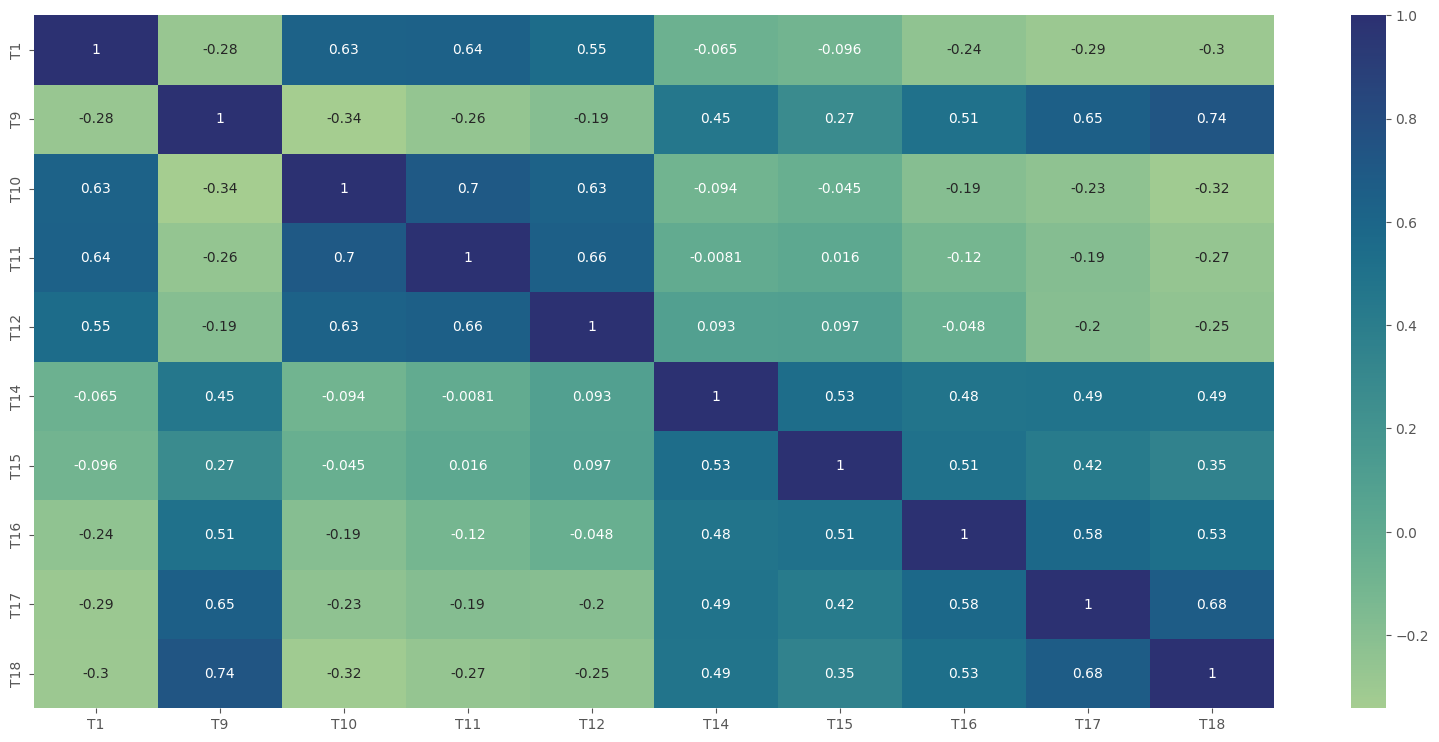

In [45]:
plt.figure(figsize=(20,9))
sns.heatmap(new_df.corr(),annot=True,cmap="crest")
plt.show()

In [51]:
scs = SmartCorrelatedSelection(threshold=0.6)
sel_df = scs.fit_transform(new_df)

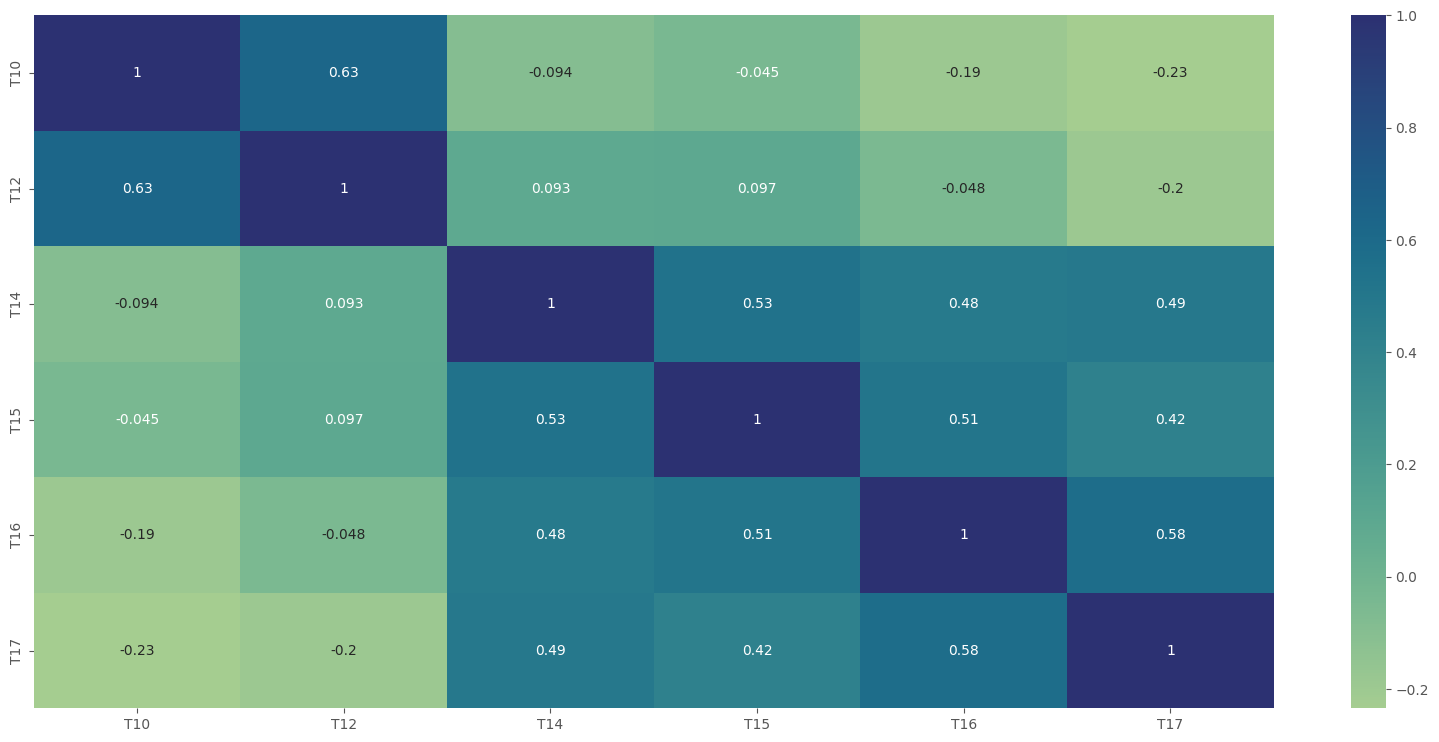

In [47]:
plt.figure(figsize=(20,9))
sns.heatmap(sel_df.corr(),annot=True,cmap="crest")
plt.show()

In [113]:
X_train, X_val, y_train, y_val = train_test_split(sel_df.drop('target',axis=1), sel_df['target'], test_size=0.3, random_state=42)

### 2.1 **Without Preprocessing**

In [85]:
y_train_transformed = pd.get_dummies(y_train)
y_val_transformed = pd.get_dummies(y_val)

In [62]:
Model_2_1 = Sequential()
Model_2_1.add(Input(shape=X_train.shape[1]))
Model_2_1.add(Dense(units=32,activation='relu'))
Model_2_1.add(Dense(units=16,activation='relu'))
Model_2_1.add(Dense(units=160,activation='softmax'))

Model_2_1.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [56]:
Model_2_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                224       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3472 (13.56 KB)
Trainable params: 3472 (13.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
Model_2_1.fit(X_train,y_train_transformed,epochs=150,batch_size=256,validation_data=(X_val,y_val_transformed))

Epoch 1/150
101/101 [==============================] - 1s 4ms/step - loss: 5.7974 - categorical_crossentropy: 5.7974 - val_loss: 4.7106 - val_categorical_crossentropy: 4.7106
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 4.2120 - categorical_crossentropy: 4.2120 - val_loss: 3.6877 - val_categorical_crossentropy: 3.6877
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 3.1490 - categorical_crossentropy: 3.1490 - val_loss: 2.6310 - val_categorical_crossentropy: 2.6310
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 2.2834 - categorical_crossentropy: 2.2834 - val_loss: 2.0069 - val_categorical_crossentropy: 2.0069
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 1.8258 - categorical_crossentropy: 1.8258 - val_loss: 1.6717 - val_categorical_crossentropy: 1.6717
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 1.5515 - categorical_crossentropy: 1.5515 - val_lo

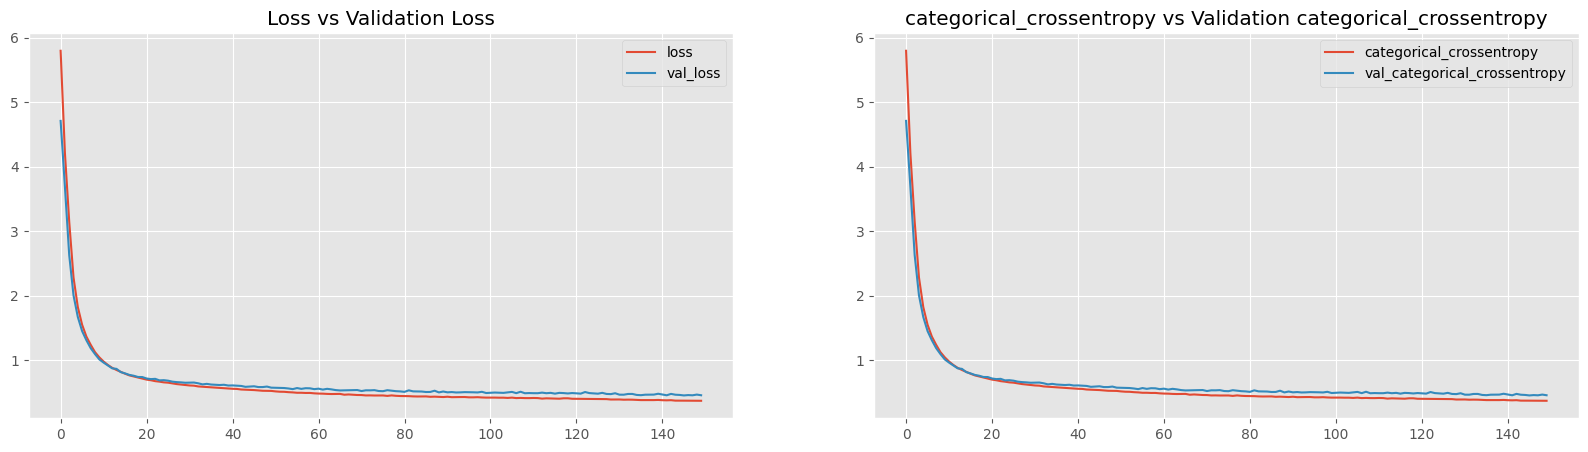

In [64]:
Model_Results_2_1 = pd.DataFrame(Model_2_1.history.history)
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Loss vs Validation Loss')
ax[0].plot(Model_Results_2_1['loss'],label='loss')
ax[0].plot(Model_Results_2_1['val_loss'],label='val_loss')
ax[0].legend()

ax[1].set_title('categorical_crossentropy vs Validation categorical_crossentropy')
ax[1].plot(Model_Results_2_1['categorical_crossentropy'],label='categorical_crossentropy')
ax[1].plot(Model_Results_2_1['val_categorical_crossentropy'],label='val_categorical_crossentropy')
ax[1].legend()

plt.show()

In [86]:
# X_val,y_val_transformed
Model_2_1_val_pred = Model_2_1.predict(X_val)

345/345 [==============================] - 0s 904us/step


In [97]:
# y_val_transformed.idxmax(axis=1)
Model_2_1_val_orig  = np.array(y_val_transformed).argmax(axis=1)
Model_2_1_val_predictions = Model_2_1_val_pred.argmax(axis=1)

In [100]:
print(f"Validation Results \nprecision_score : {precision_score(Model_2_1_val_orig,Model_2_1_val_predictions, average='weighted')},\nrecall_score : {recall_score(Model_2_1_val_orig,Model_2_1_val_predictions, average='weighted')},\nf1_score : {f1_score(Model_2_1_val_orig,Model_2_1_val_predictions, average='weighted')}")

Validation Results 
precision_score : 0.9206735679592593,
recall_score : 0.9205514239071286,
f1_score : 0.918459475503534


### 2.2 With Preprocessing

In [103]:
stdscaler = StandardScaler()
X_train_transformed = stdscaler.fit_transform(X_train,y_train_transformed)
X_val_transformed = stdscaler.transform(X_val)

In [104]:
Model_2_2 = Sequential()
Model_2_2.add(Input(shape=X_train.shape[1]))
Model_2_2.add(Dense(units=32,activation='relu'))
Model_2_2.add(Dense(units=16,activation='relu'))
Model_2_2.add(Dense(units=160,activation='softmax'))

Model_2_2.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [105]:
Model_2_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                224       
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3472 (13.56 KB)
Trainable params: 3472 (13.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
Model_2_2.fit(X_train_transformed,y_train_transformed,epochs=250,batch_size=256,validation_data=(X_val_transformed,y_val_transformed))

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 4.8441 - categorical_crossentropy: 4.8441 - val_loss: 4.4139 - val_categorical_crossentropy: 4.4139
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 3.8154 - categorical_crossentropy: 3.8154 - val_loss: 3.2182 - val_categorical_crossentropy: 3.2182
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 2.7375 - categorical_crossentropy: 2.7375 - val_loss: 2.3007 - val_categorical_crossentropy: 2.3007
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.9665 - categorical_crossentropy: 1.9665 - val_loss: 1.6832 - val_categorical_crossentropy: 1.6832
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4669 - categorical_crossentropy: 1.4669 - val_loss: 1.2985 - val_categorical_crossentropy: 1.2985
Epoch 6/250
101/101 [==============================] - 0s 2ms/step - loss: 1.1514 - categorical_crossentropy: 1.1514 - val_lo

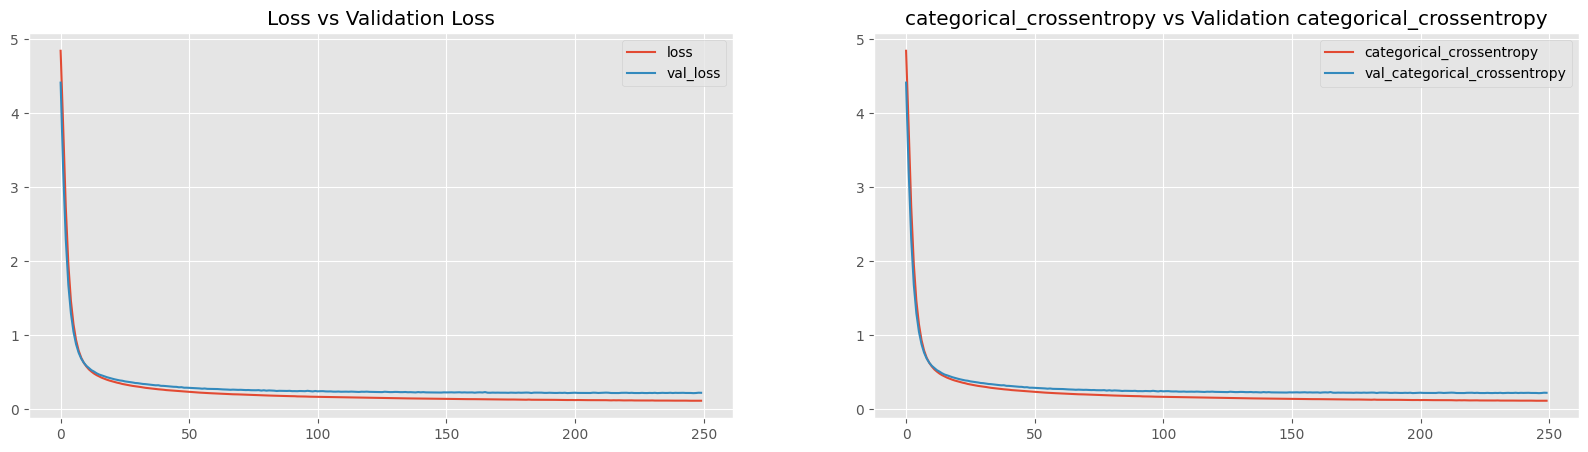

In [107]:
Model_Results_2_2 = pd.DataFrame(Model_2_2.history.history)
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Loss vs Validation Loss')
ax[0].plot(Model_Results_2_2['loss'],label='loss')
ax[0].plot(Model_Results_2_2['val_loss'],label='val_loss')
ax[0].legend()

ax[1].set_title('categorical_crossentropy vs Validation categorical_crossentropy')
ax[1].plot(Model_Results_2_2['categorical_crossentropy'],label='categorical_crossentropy')
ax[1].plot(Model_Results_2_2['val_categorical_crossentropy'],label='val_categorical_crossentropy')
ax[1].legend()

plt.show()

In [109]:
# X_val,y_val_transformed
Model_2_2_val_pred = Model_2_2.predict(X_val_transformed)

345/345 [==============================] - 1s 1ms/step


In [110]:
# y_val_transformed.idxmax(axis=1)
Model_2_2_val_orig  = np.array(y_val_transformed).argmax(axis=1)
Model_2_2_val_predictions = Model_2_2_val_pred.argmax(axis=1)

In [112]:
print(f"Validation Results \nprecision_score : {precision_score(Model_2_2_val_orig,Model_2_2_val_predictions, average='weighted')},\nrecall_score : {recall_score(Model_2_2_val_orig,Model_2_2_val_predictions, average='weighted')},\nf1_score : {f1_score(Model_2_2_val_orig,Model_2_2_val_predictions, average='weighted')}")

Validation Results 
precision_score : 0.9544368995013309,
recall_score : 0.9538363867222928,
f1_score : 0.9529309708705186
